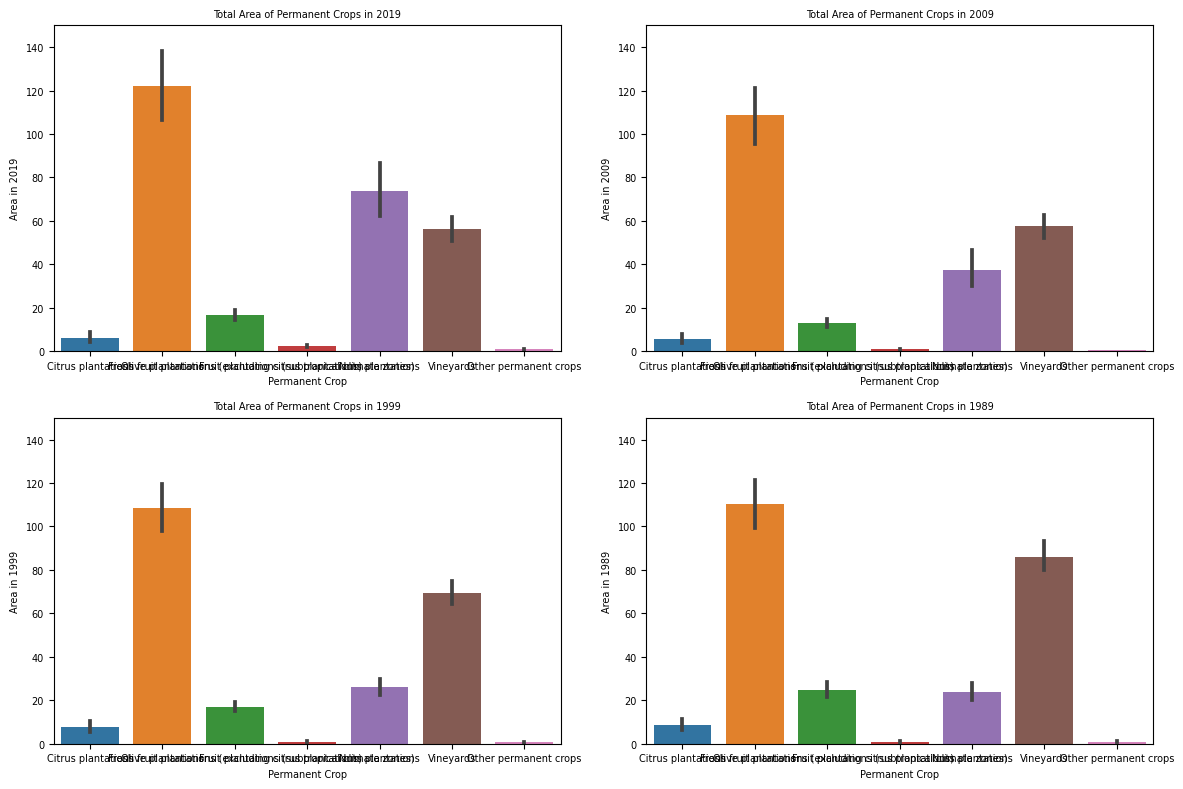

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Create subplots for each year
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Get the maximum value across all years for setting a common y-axis limit
max_value = 150
lettersize=7

# Plot the total area for each crop in 2019
sns.barplot(x='Perm_crop', y='Area_2019', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[0, 0].set_ylabel('Area in 2019', fontsize=lettersize)
axes[0, 0].set_title('Total Area of Permanent Crops in 2019', fontsize=lettersize)
axes[0, 0].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[0, 0].tick_params(axis='y', labelsize=lettersize)
axes[0, 0].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 2009
sns.barplot(x='Perm_crop', y='Area_2009', data=data, ax=axes[0, 1])
axes[0, 1].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[0, 1].set_ylabel('Area in 2009', fontsize=lettersize)
axes[0, 1].set_title('Total Area of Permanent Crops in 2009', fontsize=lettersize)
axes[0, 1].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[0, 1].tick_params(axis='y', labelsize=lettersize)
axes[0, 1].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 1999
sns.barplot(x='Perm_crop', y='Area_1999', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[1, 0].set_ylabel('Area in 1999', fontsize=lettersize)
axes[1, 0].set_title('Total Area of Permanent Crops in 1999', fontsize=lettersize)
axes[1, 0].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[1, 0].tick_params(axis='y', labelsize=lettersize)
axes[1, 0].set_ylim([0, max_value])  # Set common y-axis limit

# Plot the total area for each crop in 1989
sns.barplot(x='Perm_crop', y='Area_1989', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('Permanent Crop', fontsize=lettersize)
axes[1, 1].set_ylabel('Area in 1989', fontsize=lettersize)
axes[1, 1].set_title('Total Area of Permanent Crops in 1989', fontsize=lettersize)
axes[1, 1].tick_params(axis='x', rotation=0, labelsize=lettersize)
axes[1, 1].tick_params(axis='y', labelsize=lettersize)
axes[1, 1].set_ylim([0, max_value])  # Set common y-axis limit

# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()


Bar chart of the Total Area of Permanent Crops by Year (of all Freguesias in Portugal):

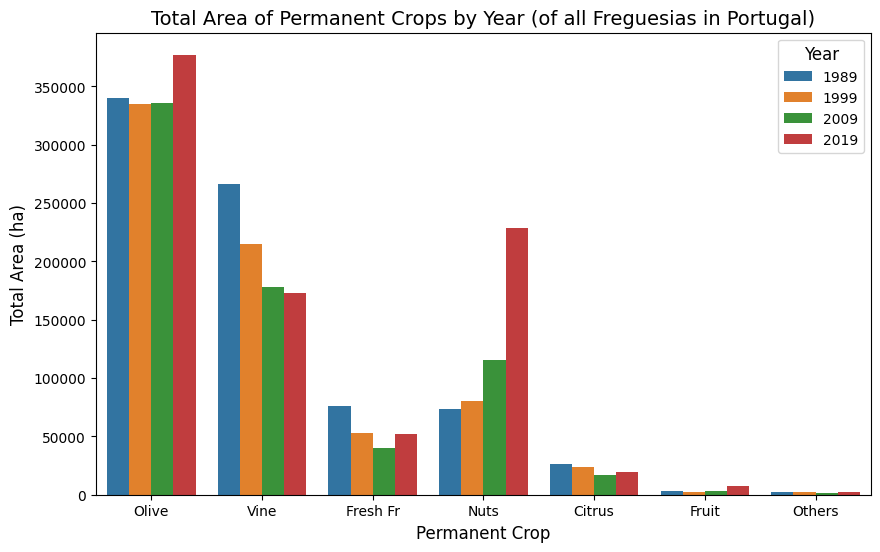

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Rename the columns
data.rename(columns={'Area_1989': '1989'}, inplace=True)
data.rename(columns={'Area_1999': '1999'}, inplace=True)
data.rename(columns={'Area_2009': '2009'}, inplace=True)
data.rename(columns={'Area_2019': '2019'}, inplace=True)

# Group the data by crop and calculate the total area for each crop
crop_totals_1989 = data.groupby('Perm_crop')[['1989', '1999', '2009', '2019']].sum().reset_index()

# Sort the data by total area in descending order
crop_totals_1989 = crop_totals_1989.sort_values('1989', ascending=False)

# Create custom abbreviations for x-axis labels
abbreviations = ['Olive', 'Vine', 'Fresh Fr', 'Nuts', 'Citrus', 'Fruit', 'Others']  # Update with desired abbreviations

# Add the abbreviations as a new column in crop_totals DataFrame
crop_totals_1989['Abbreviation'] = abbreviations

# Melt the data to convert the year columns into a single 'Year' column
melted_data = pd.melt(crop_totals_1989, id_vars=['Perm_crop', 'Abbreviation'], var_name='Year', value_name='Total_Area')

# Create a bar chart to visualize the total area for each crop over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='Perm_crop', y='Total_Area', hue='Year', data=melted_data)
plt.xlabel('Permanent Crop', fontsize=12)
plt.ylabel('Total Area (ha)', fontsize=12)
plt.title('Total Area of Permanent Crops by Year (of all Freguesias in Portugal)', fontsize=14)
plt.xticks(range(len(crop_totals_1989)), abbreviations, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Year', fontsize=10, title_fontsize=12, loc='upper right')
plt.show()



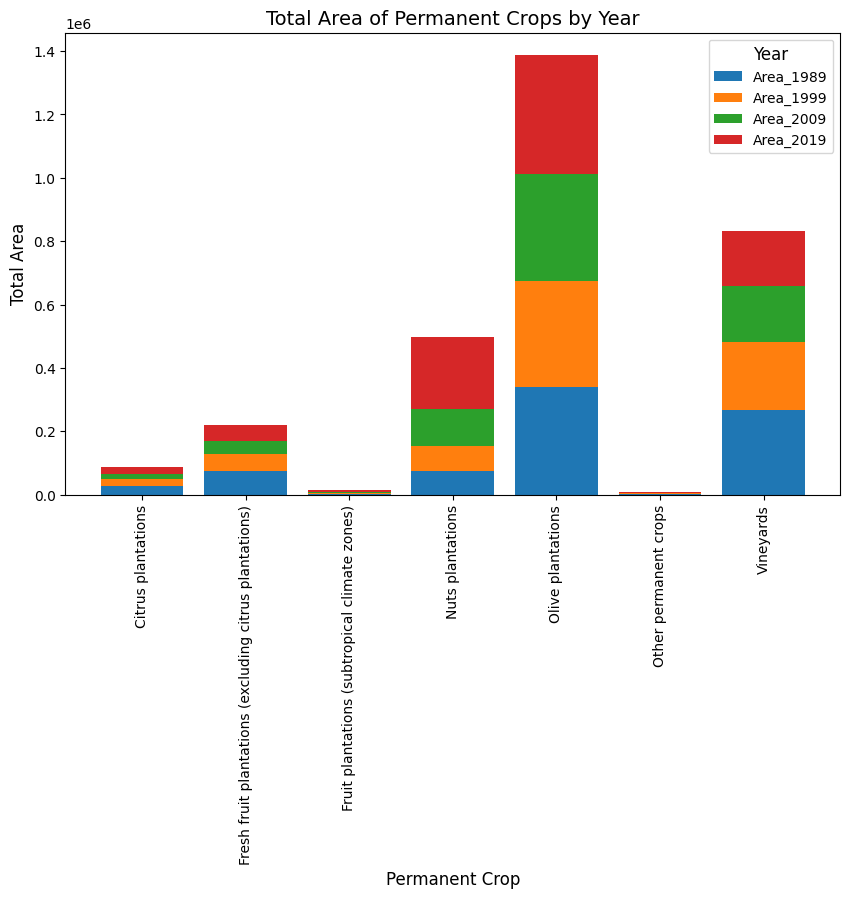

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Group the data by crop and calculate the sum of the areas for each year
crop_totals = data.groupby('Perm_crop')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum().reset_index()

# Set the crop names as the x-axis labels
crop_names = crop_totals['Perm_crop']

# Set the years
years = ['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']

# Create a list to store the heights of each stacked bar
bar_heights = []

# Calculate the sum of areas for each year and append to the bar heights list
for year in years:
    bar_heights.append(crop_totals[year].values)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(crop_names, bar_heights[0], label=years[0])
for i in range(1, len(years)):
    plt.bar(crop_names, bar_heights[i], bottom=sum(bar_heights[:i]), label=years[i])

# Add labels and title
plt.xlabel('Permanent Crop', fontsize=12)
plt.ylabel('Total Area', fontsize=12)
plt.title('Total Area of Permanent Crops by Year', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend(title='Year', fontsize=10, title_fontsize=12)

# Display the chart
plt.show()


<Figure size 1000x600 with 0 Axes>

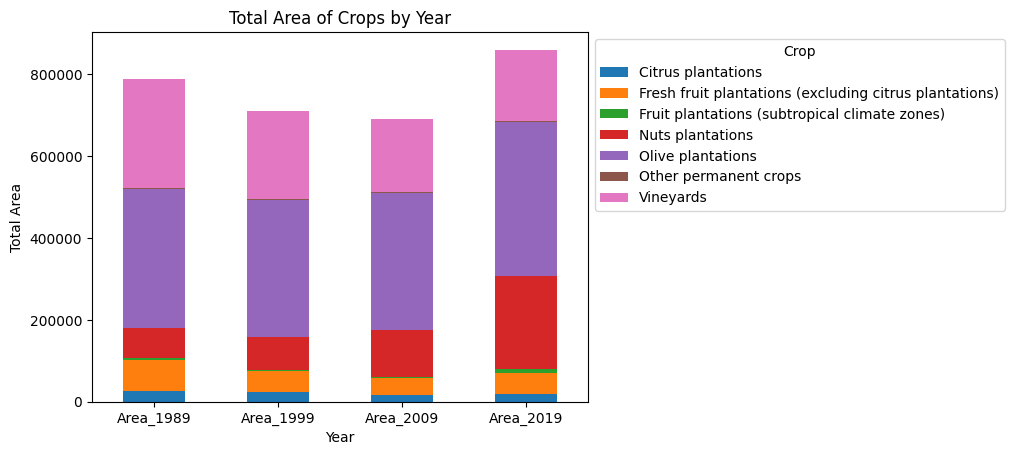

In [14]:
# Calculate the sum of areas for each year
crop_totals = data.groupby('Perm_crop')[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum().reset_index()

# Set the crop column as the index
crop_totals.set_index('Perm_crop', inplace=True)

# Transpose the DataFrame to have years as columns
crop_totals = crop_totals.T


# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
crop_totals.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Total Area')
plt.title('Total Area of Crops by Year')
plt.xticks(rotation=0)
plt.legend(title='Crop', bbox_to_anchor=(1, 1))


plt.show()



C:\Users\alfor\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alfor\AppData\Local\Temp\ipykernel_30736\660109568.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Cluster'] = kmeans.labels_


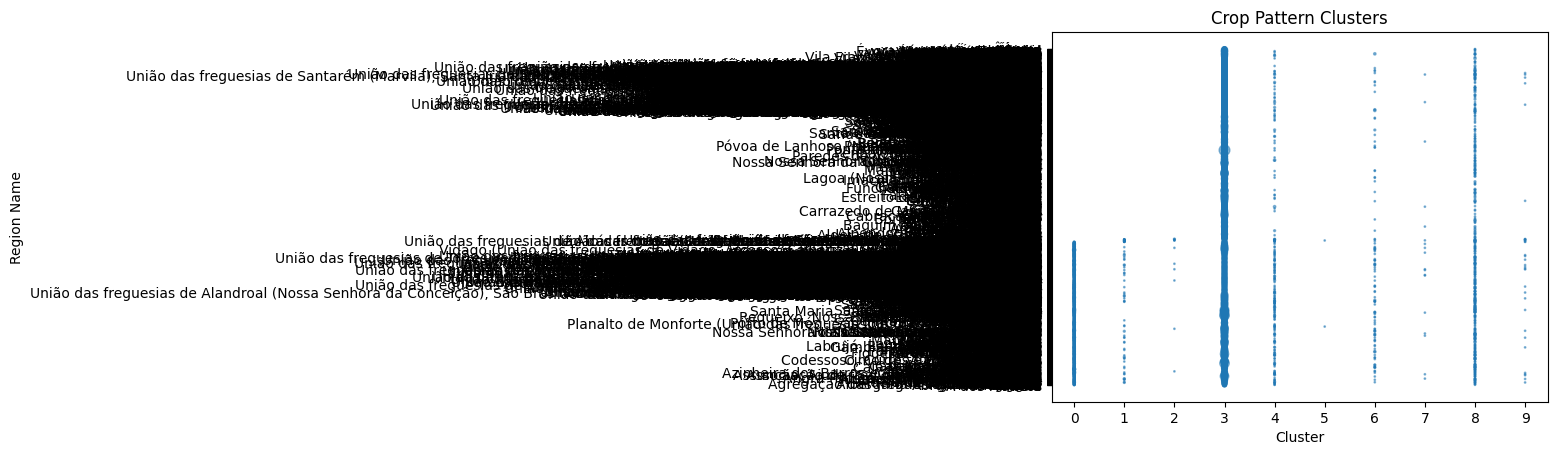

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Read the database into a DataFrame
data = pd.read_csv("3_temp_crops.csv")

# Encode the categorical columns
label_encoder = LabelEncoder()
data['Encoded_temp_crop'] = label_encoder.fit_transform(data['Temp_crop'])

# Select the relevant columns for clustering
crop_data = data[['region_name', 'Encoded_temp_crop', 'Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']]

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crop_data.iloc[:, 5:])

# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)

# Add the cluster labels to the DataFrame
crop_data['Cluster'] = kmeans.labels_

# Group the data by cluster and region_name
grouped_data = crop_data.groupby(['Cluster', 'region_name']).size().reset_index(name='Count')

# Plot the clusters
plt.scatter(grouped_data['Cluster'], grouped_data['region_name'], s=grouped_data['Count'], alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Region Name')
plt.title('Crop Pattern Clusters')
plt.xticks(range(10))
plt.show()


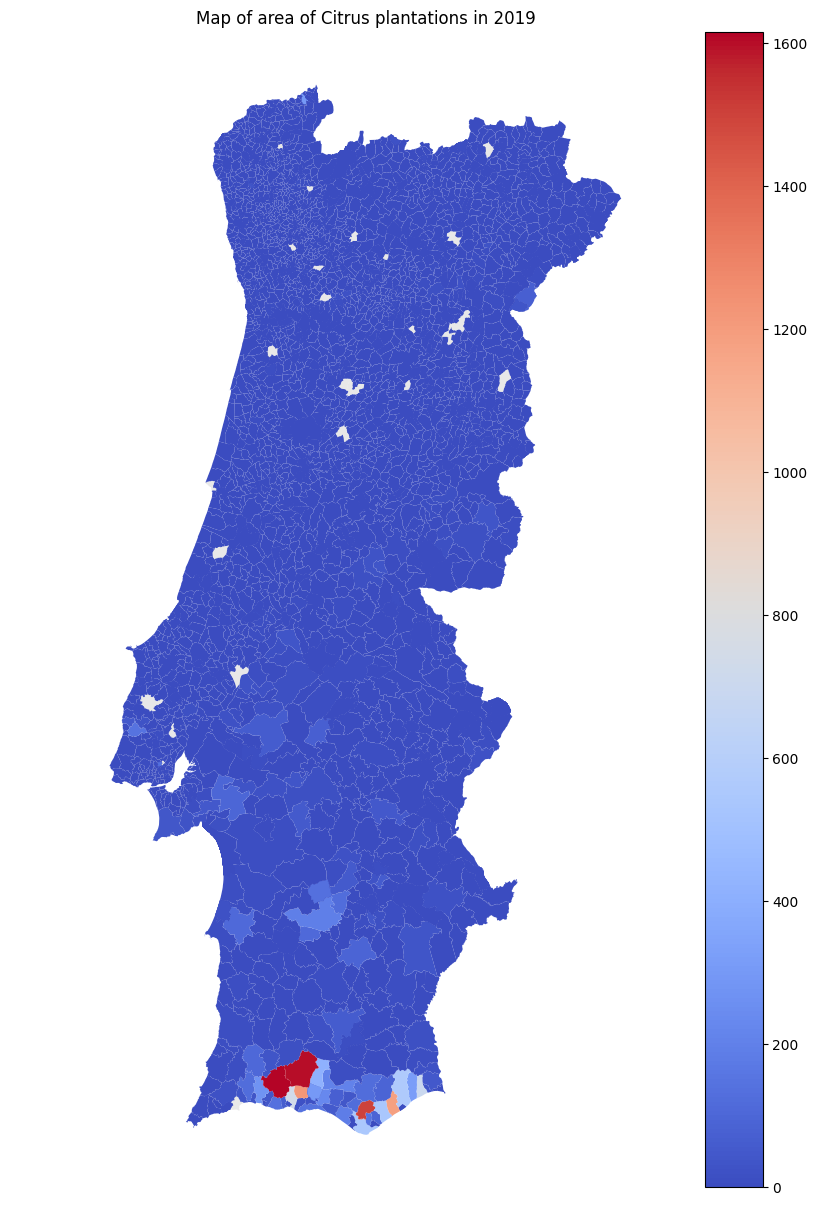

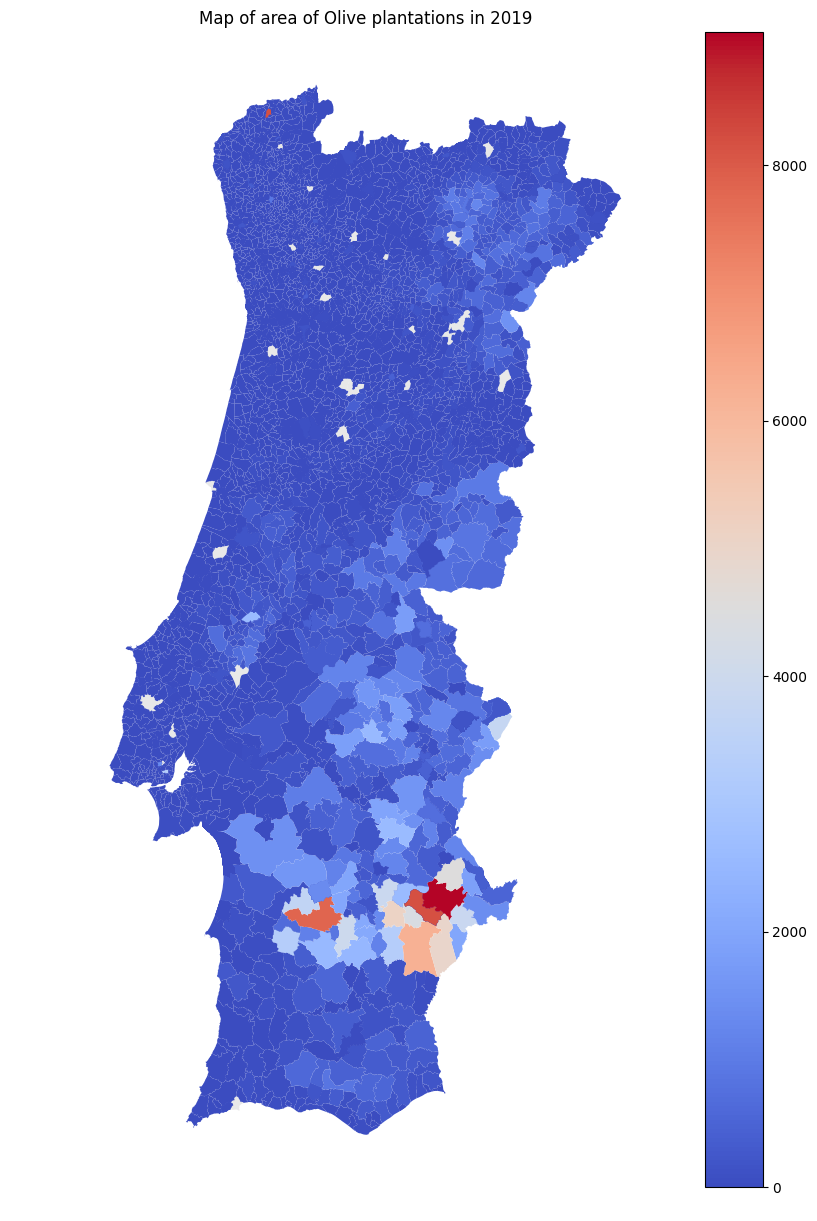

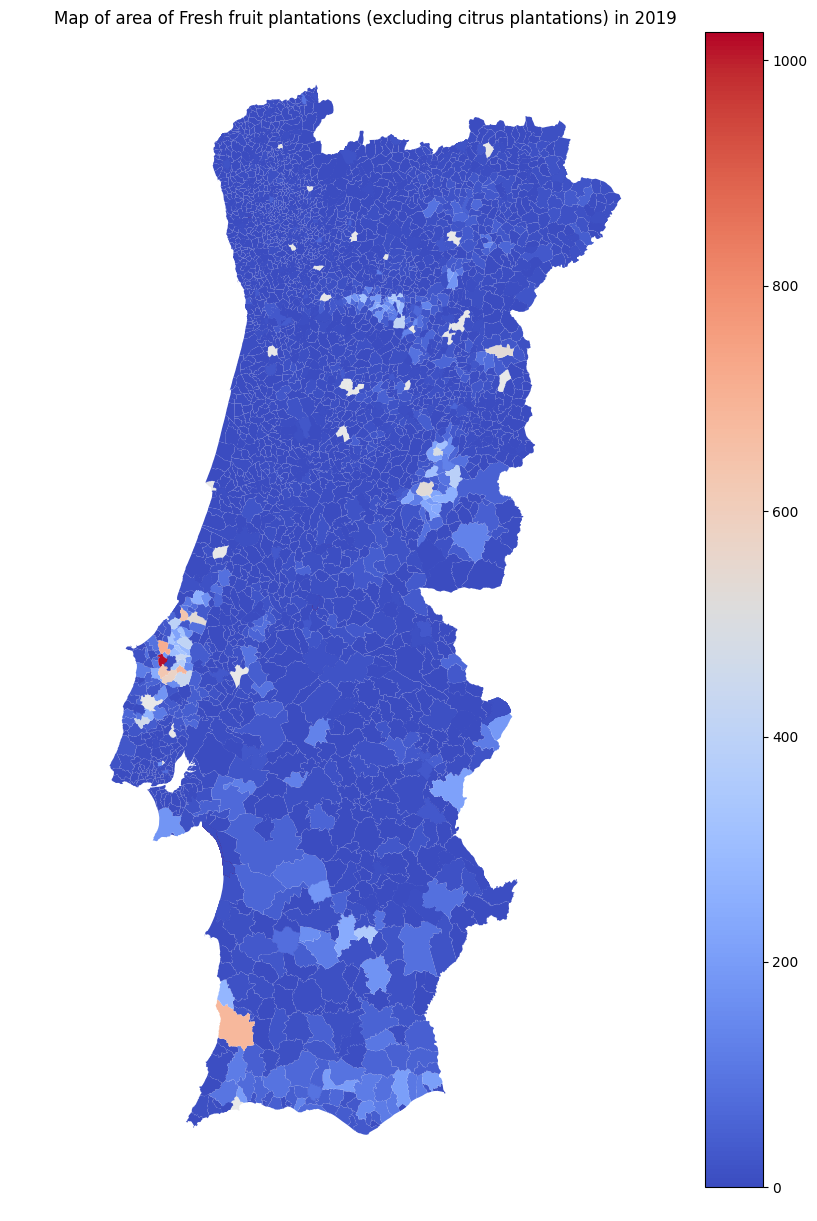

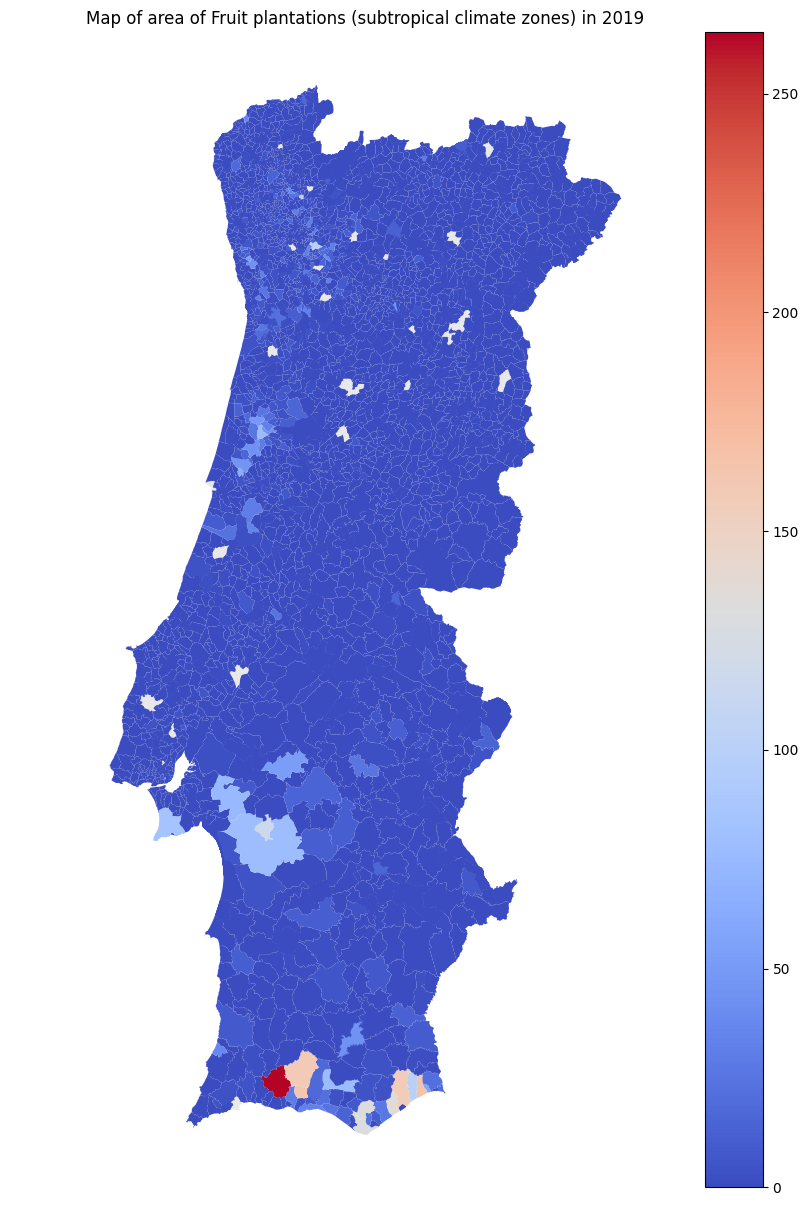

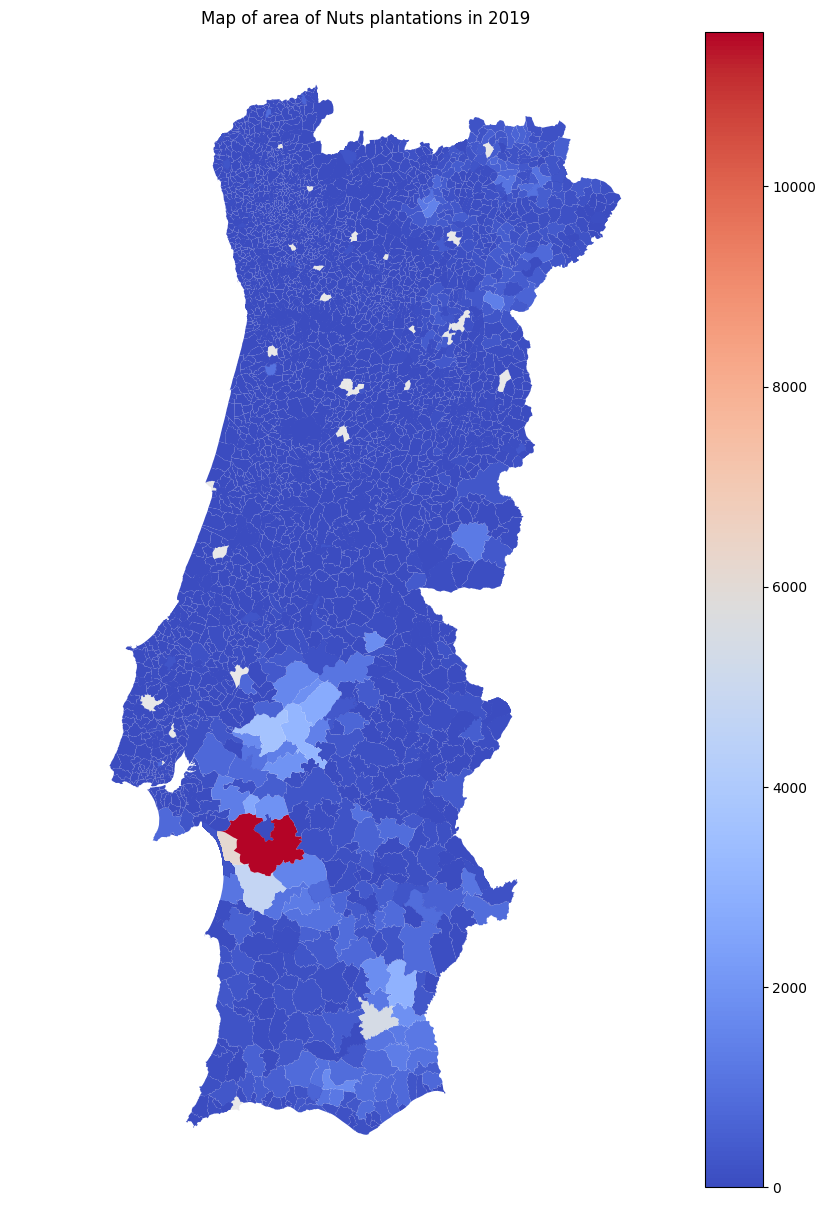

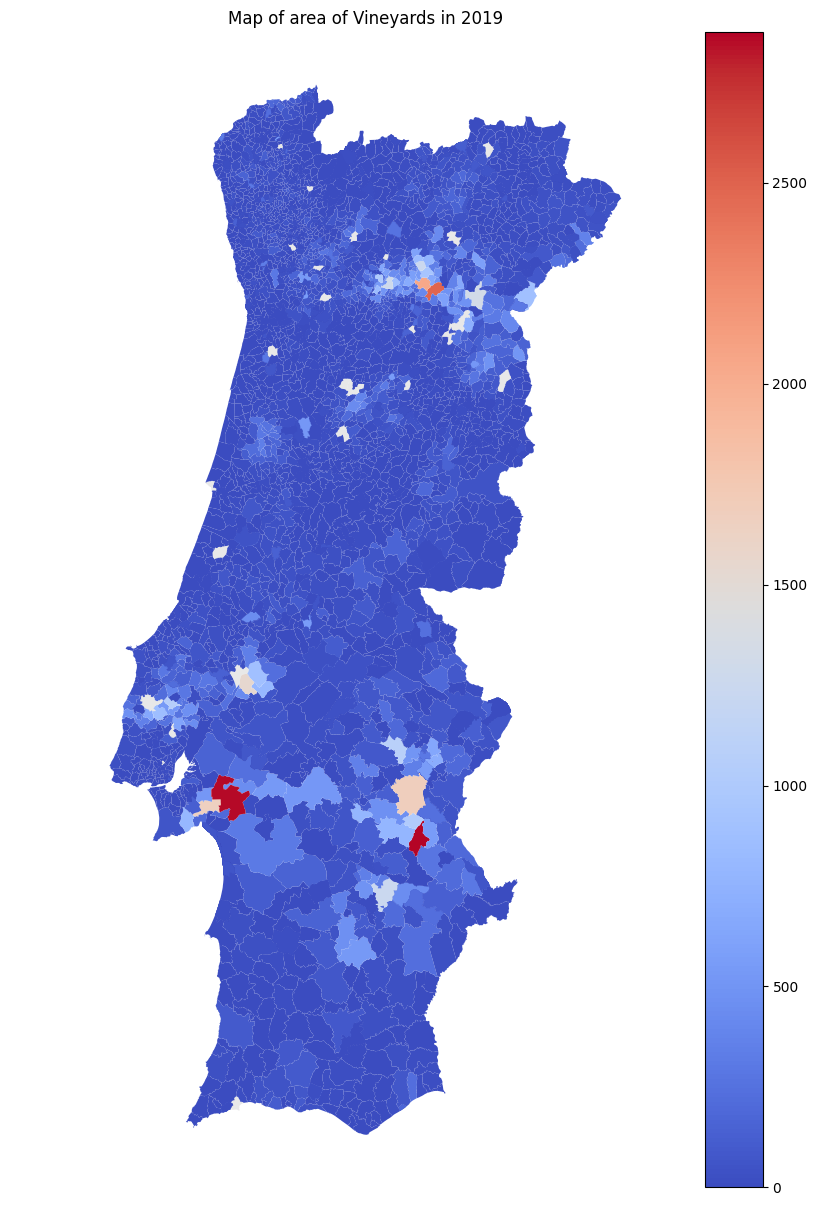

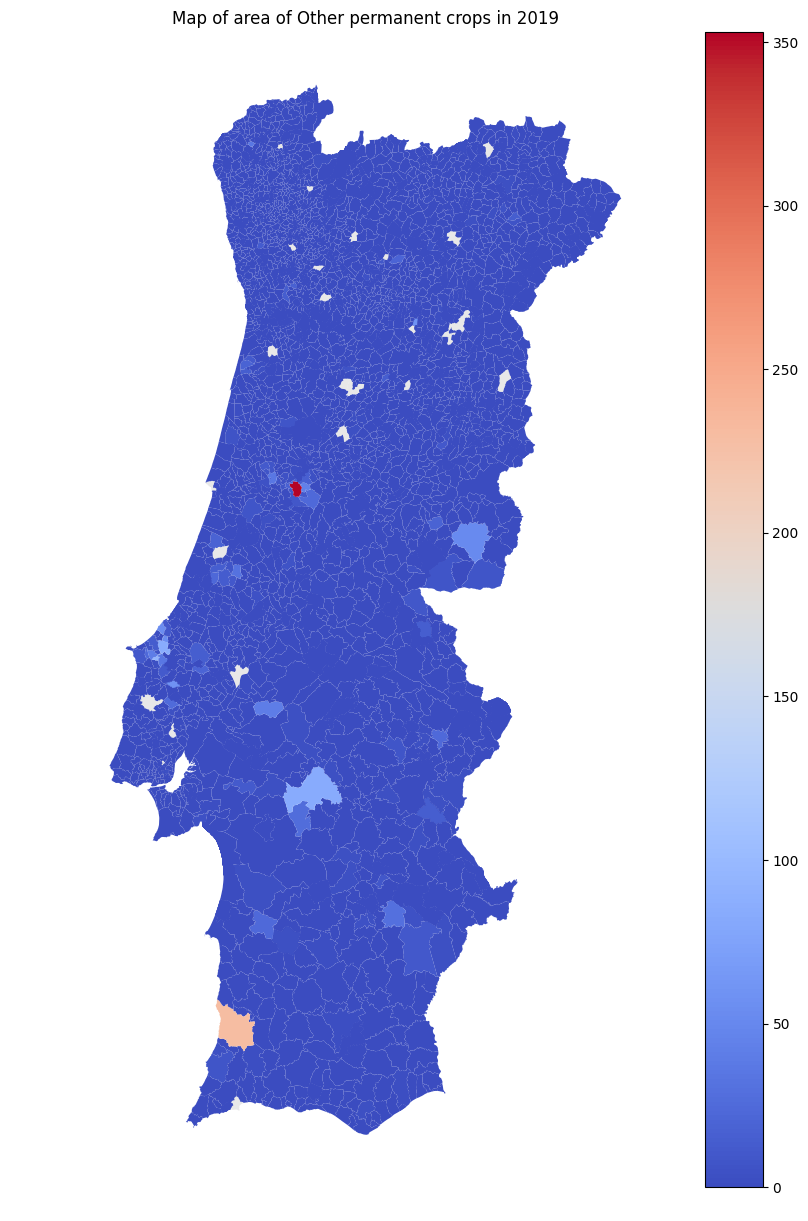

In [2]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from dbfread import DBF

# Set the SHAPE_RESTORE_SHX environment variable to YES
os.environ["SHAPE_RESTORE_SHX"] = "YES"

# Step 1: Read the shapefile using GeoPandas
shapefile_path = 'Cont_AAD_CAOP2017.shp'
map_data = gpd.read_file(shapefile_path, encoding='utf-8')

# Step 2: Read the attribute data from the DBF file using dbfread
dbf_file_path = 'Cont_AAD_CAOP2017.dbf'
attribute_data = pd.DataFrame(iter(DBF(dbf_file_path, encoding='utf-8')))

# Step 3: Read the database CSV using pandas
csv_path = '3_perm_crops.csv'
database = pd.read_csv(csv_path)

# Step 4: Connect the shapefile and attribute data based on a common column
common_column = 'Freguesia'
merged_data = map_data.merge(attribute_data, on=common_column)

# Step 5: Merge with the database based on a common column
merged_data = merged_data.merge(database, left_on='Freguesia', right_on='region_name')

# Step 6: Plot a map for each crop
crops = database['Perm_crop'].unique()  # Get unique crop names

# Set the CRS for the map_data
map_data.crs = merged_data.crs

# Set the map extent to cover all data
minx, miny, maxx, maxy = merged_data.total_bounds
map_data = map_data.cx[minx:maxx, miny:maxy]

# Iterate over crops and plot maps
for crop in crops:
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Filter merged data for the specific crop
    crop_data = merged_data[merged_data['Perm_crop'] == crop]
    
    # Plot the merged data without outlines
    crop_data.plot(ax=ax, column='Area_2019', cmap='coolwarm', legend=True, edgecolor='none')
    
    # Set the frame color and label color
    ax.set_facecolor('white')
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    
    # Add light gray color to Freguesias with value 0
    no_value = map_data[~map_data['Freguesia'].isin(crop_data['Freguesia'])]
    no_value.plot(ax=ax, facecolor='lightgray', alpha=0.5, edgecolor='none')
    
    plt.title(f'Map of area of {crop} in 2019')
    plt.show()


In [12]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from dbfread import DBF
import imageio

# Set the SHAPE_RESTORE_SHX environment variable to YES
os.environ["SHAPE_RESTORE_SHX"] = "YES"

# Step 1: Read the shapefile using GeoPandas
shapefile_path = 'Cont_AAD_CAOP2017.shp'
map_data = gpd.read_file(shapefile_path, encoding='utf-8')

# Step 2: Read the attribute data from the DBF file using dbfread
dbf_file_path = 'Cont_AAD_CAOP2017.dbf'
attribute_data = pd.DataFrame(iter(DBF(dbf_file_path, encoding='utf-8')))

# Step 3: Read the database CSV using pandas
csv_path = '3_perm_crops.csv'
database = pd.read_csv(csv_path)

# Step 4: Connect the shapefile and attribute data based on a common column
common_column = 'Freguesia'
merged_data = map_data.merge(attribute_data, on=common_column)

# Step 5: Merge with the database based on a common column
merged_data = merged_data.merge(database, left_on='Freguesia', right_on='region_name')

# Step 6: Plot a map for each crop and year
crops = database['Perm_crop'].unique()  # Get unique crop names
years = ['1989', '1999', '2009', '2019']  # Specify the years

# Set the CRS for the map_data
map_data.crs = merged_data.crs

# Set the map extent to cover all data
minx, miny, maxx, maxy = merged_data.total_bounds
map_data = map_data.cx[minx:maxx, miny:maxy]

# Create a folder to save the images
os.makedirs('images', exist_ok=True)

# Iterate over crops and years and plot maps
for crop in crops:
    crop_images = []
    for year in years:
        fig, ax = plt.subplots(figsize=(15, 15))
        
        # Filter merged data for the specific crop and year
        crop_data = merged_data[(merged_data['Perm_crop'] == crop)]
        
        # Plot the merged data without outlines
        crop_data.plot(ax=ax, column=f'Area_{year}', cmap='coolwarm', legend=True, edgecolor='none')
        
        # Set the frame color and label color
        ax.set_facecolor('white')
        ax.tick_params(colors='white')
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Add light gray color to Freguesias with value 0
        no_value = map_data[~map_data['Freguesia'].isin(crop_data['Freguesia'])]
        no_value.plot(ax=ax, color='#0320fc', alpha=0.5, edgecolor='none')
        
        plt.title(f'Map of area of {crop} in {year}', fontsize=17)

        
        # Save the image to the "images" folder
        image_path = os.path.join('images', f'{crop}_{year}.png')
        plt.savefig(image_path)
        crop_images.append(image_path)
        
        plt.close(fig)  # Close the figure to free up memory
    
    # Create a GIF animation for the specific crop
    output_path = os.path.join('images', f'{crop}_animation.gif')
    images = [imageio.imread(image) for image in crop_images]
    images.extend(reversed(images))  # Append reversed images to create a loop
    imageio.mimsave(output_path, images, duration=5,loop=0)

# Create a GIF animation for all crops and years
all_images = []
for year in years:
    images_per_year = [imageio.imread(os.path.join('images', f'{crop}_{year}.png')) for crop in crops]
    all_images.extend(images_per_year)

output_path = os.path.join('images', 'all_perm_crops_animation.gif')
imageio.mimsave(output_path, all_images, duration=90,loop=0)




C:\Users\alfor\AppData\Local\Temp\ipykernel_31560\3228936294.py:78: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image) for image in crop_images]
C:\Users\alfor\AppData\Local\Temp\ipykernel_31560\3228936294.py:78: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(image) for image in crop_images]
C:\Users\alfor\AppData\Local\Temp\ipykernel_31560\3228936294.py:78: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) us

C:\Users\alfor\AppData\Local\Temp\ipykernel_12012\2939683515.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Total_Area'] = category_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1)
C:\Users\alfor\AppData\Local\Temp\ipykernel_12012\2939683515.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Total_Area'] = category_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1)
C:\Users\alfor\AppData\Local\Temp\ipykernel_12012\2939683515.py:

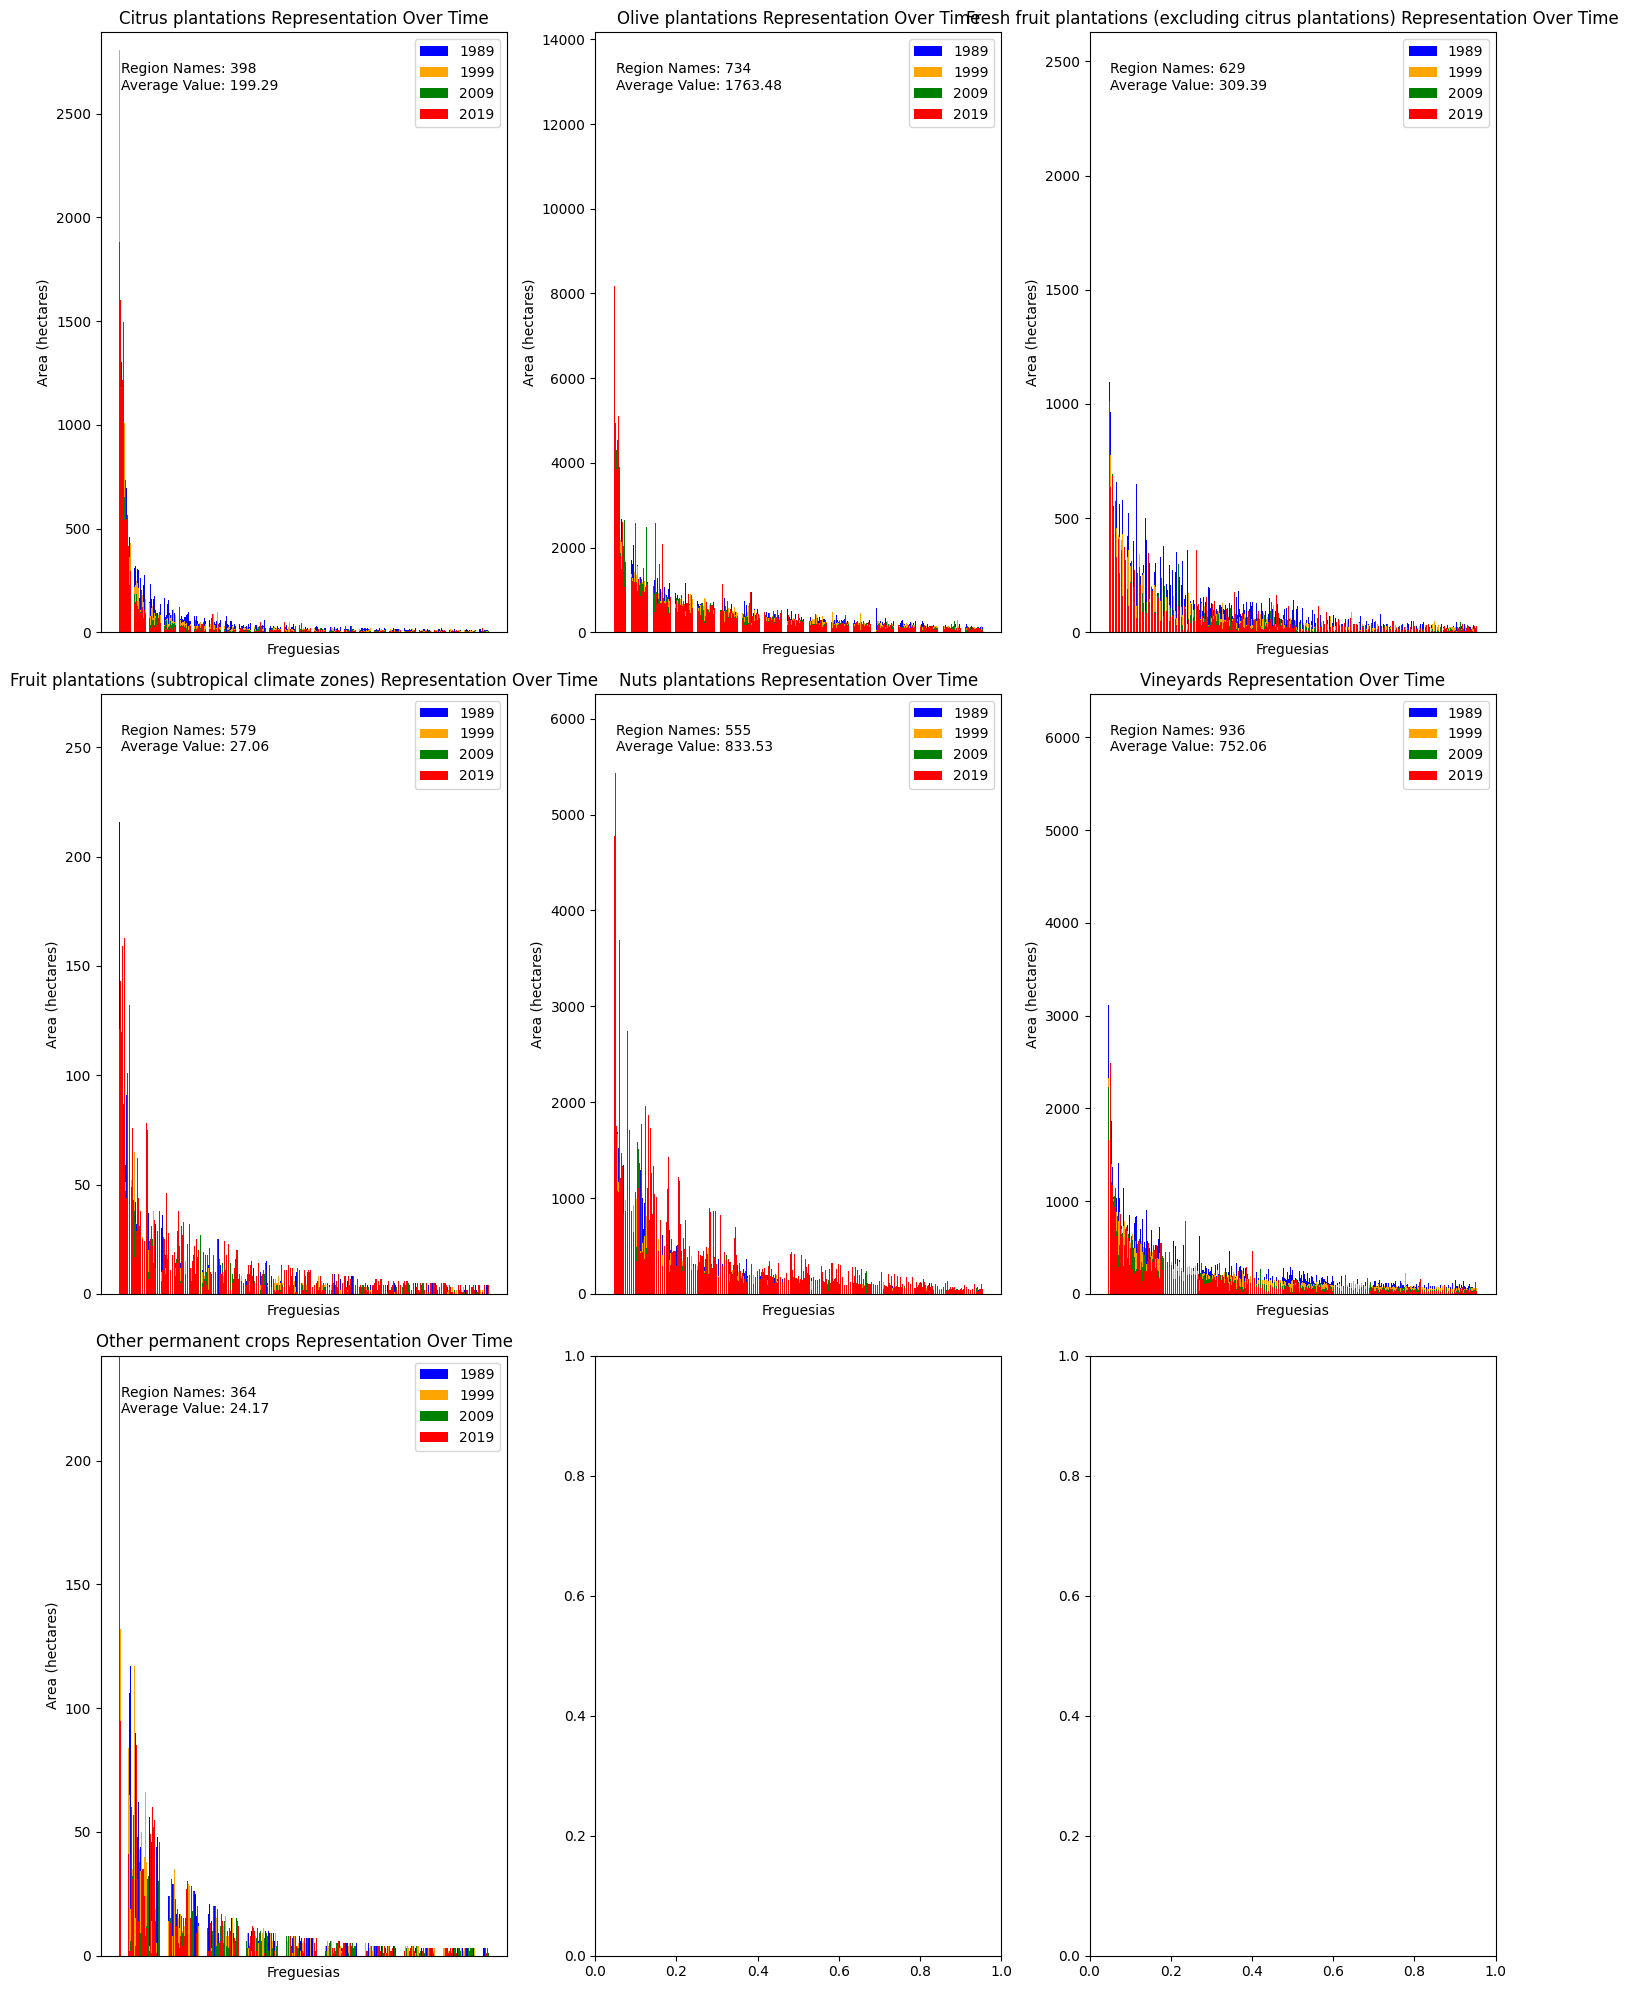

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Get unique Perm_crop categories
categories = data['Perm_crop'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(len(categories) / 3))
num_cols = min(3, len(categories))

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each category
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = data[data['Perm_crop'] == category]

    # Calculate the sum of all four years for each region
    category_data['Total_Area'] = category_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1)

    # Calculate the threshold based on 80% of the region_name values
    threshold = category_data['Total_Area'].mean() * 0.7

    # Filter regions with area greater than the threshold
    category_data = category_data[category_data['Total_Area'] > threshold]
    
    # Sort the values by the total area in descending order
    category_data = category_data.sort_values(by='Total_Area', ascending=False)

    # Plot the bars for each year with specific colors
    axes[i].bar(category_data['region_name'], category_data['Area_1989'], label='1989', color='blue')
    axes[i].bar(category_data['region_name'], category_data['Area_1999'], label='1999', color='orange')
    axes[i].bar(category_data['region_name'], category_data['Area_2009'], label='2009', color='green')
    axes[i].bar(category_data['region_name'], category_data['Area_2019'], label='2019', color='red')

    axes[i].set_title(f'{category} Representation Over Time')
    axes[i].set_xlabel('Freguesias')
    axes[i].set_ylabel('Area (hectares)')

    # Remove x-axis labels
    axes[i].set_xticks([])

    # Get the top 3 values and calculate their average
    top_three = category_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1).nlargest(15)
    y_max = top_three.mean()

    # Check if y_max is a valid value
    if np.isfinite(y_max):
        axes[i].set_ylim(0, y_max)
    else:
        # Get the top 2 values and calculate their average
        top_two = category_data[['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019']].sum(axis=1).nlargest(5)
        y_max = top_two.mean()

        # Check if y_max is a valid value
        if np.isfinite(y_max):
            axes[i].set_ylim(0, y_max)

    # Create legends with colors for each year
    legend_colors = ['blue', 'orange', 'green', 'red']
    legend_labels = ['1989', '1999', '2009', '2019']
    axes[i].legend(legend_labels, loc='upper right')

    # Add text with number of region names and average value
    num_regions = len(category_data['region_name'])
    avg_value = category_data['Total_Area'].mean()
    text = f'Region Names: {num_regions}\nAverage Value: {avg_value:.2f}'
    axes[i].text(0.05, 0.95, text, transform=axes[i].transAxes, verticalalignment='top')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()